# Random Forest Classifier

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Load dataset
iris = datasets.load_iris()

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# Creating a DataFrame of given iris dataset.
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
X = X.astype(str)
y=data['species']  # Labels
y = y.astype(str)

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [6]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=8,criterion="entropy",random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [7]:
# creating confusion matrix and accuracy score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[11  0  0]
 [ 0 19  1]
 [ 0  3 11]]


0.9111111111111111

In [8]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.363256
petal width (cm)     0.348368
sepal length (cm)    0.245619
sepal width (cm)     0.042757
dtype: float64

### Visualizing least imp feature

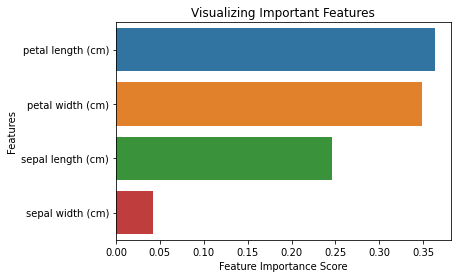

In [9]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Visulaizing all decision trees

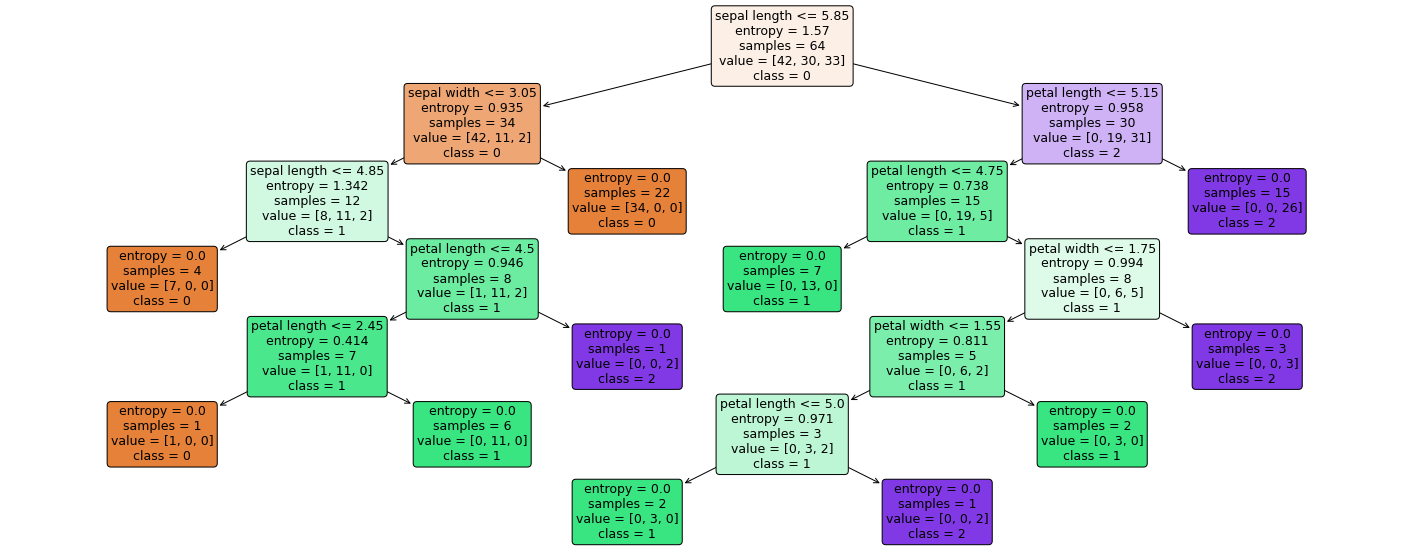

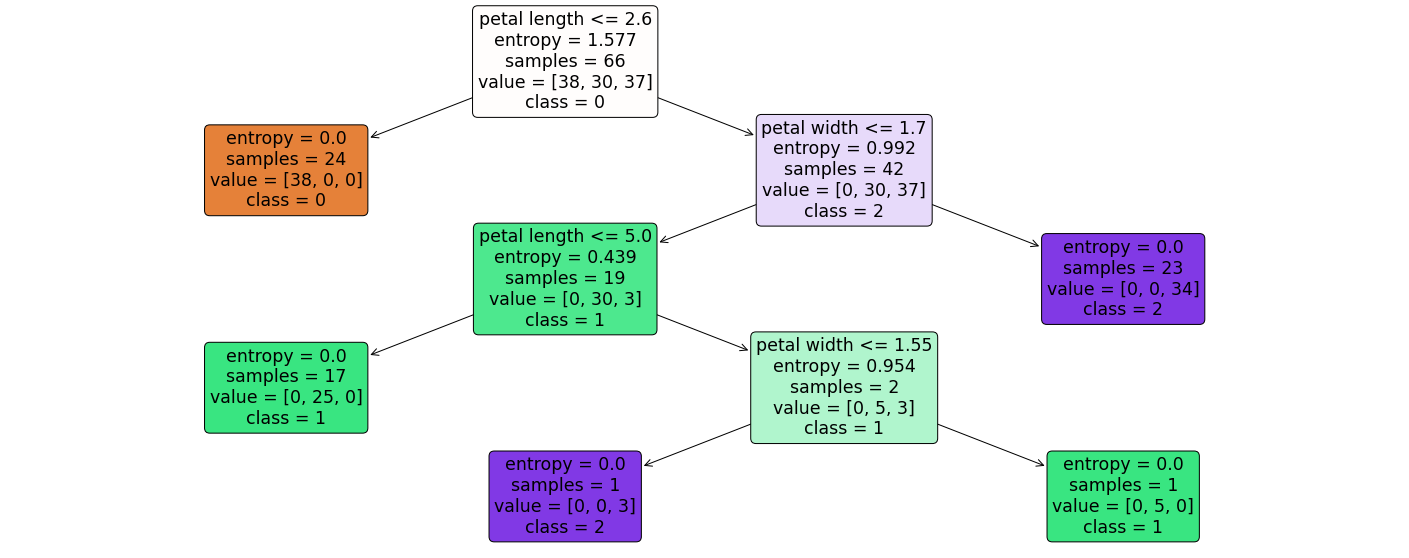

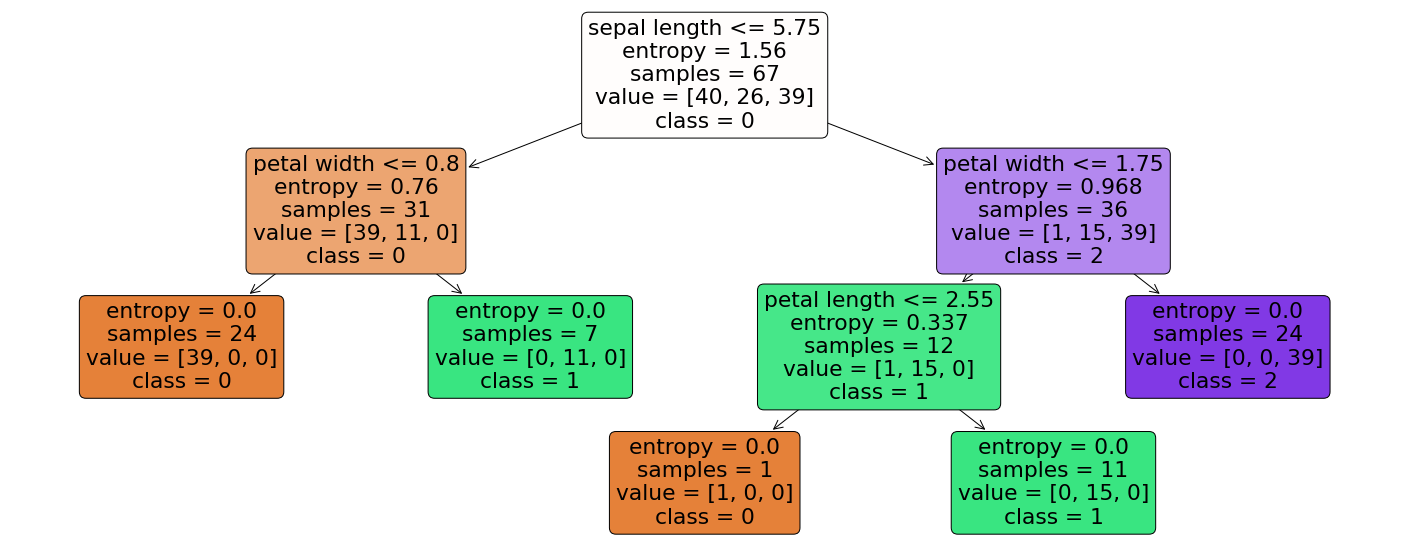

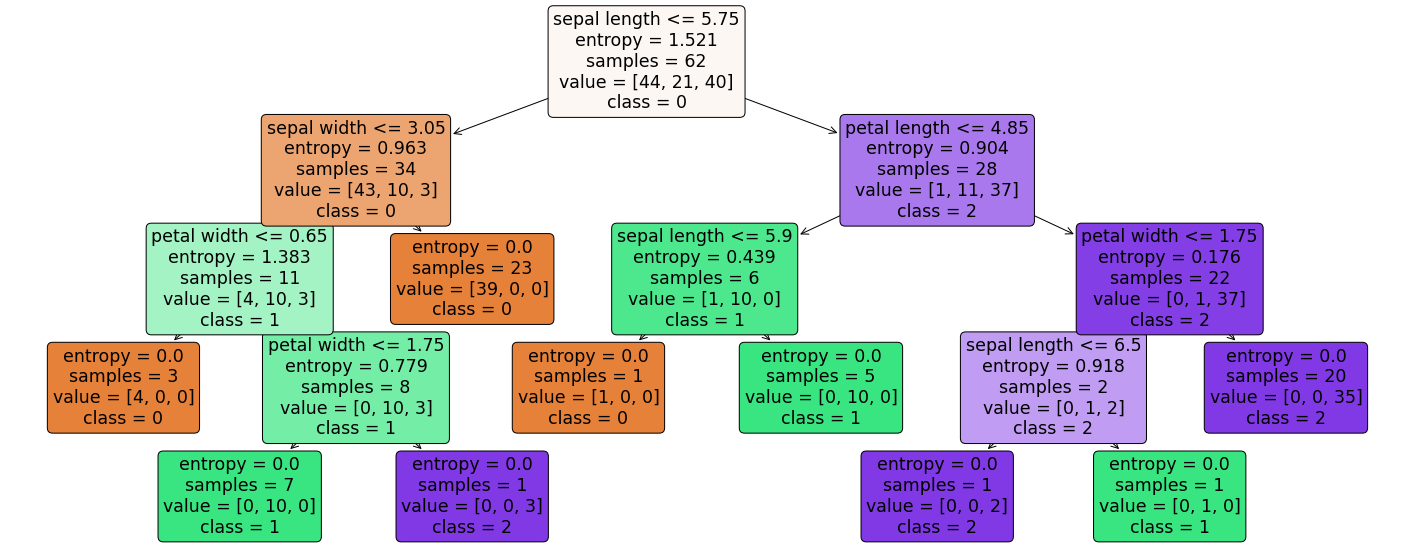

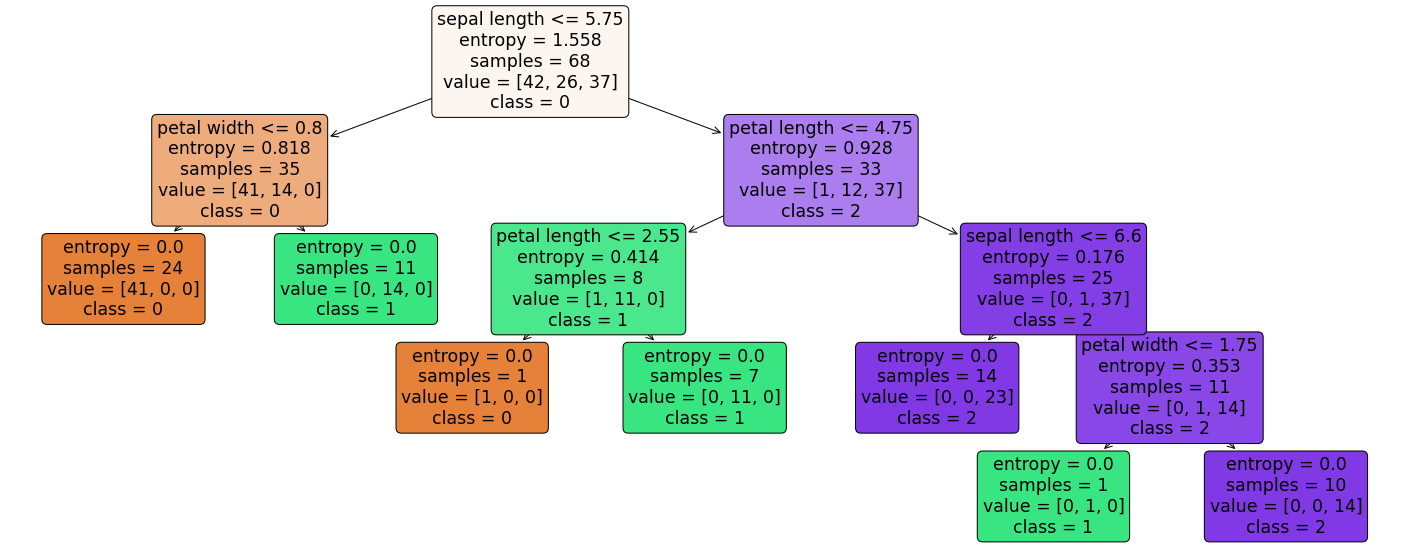

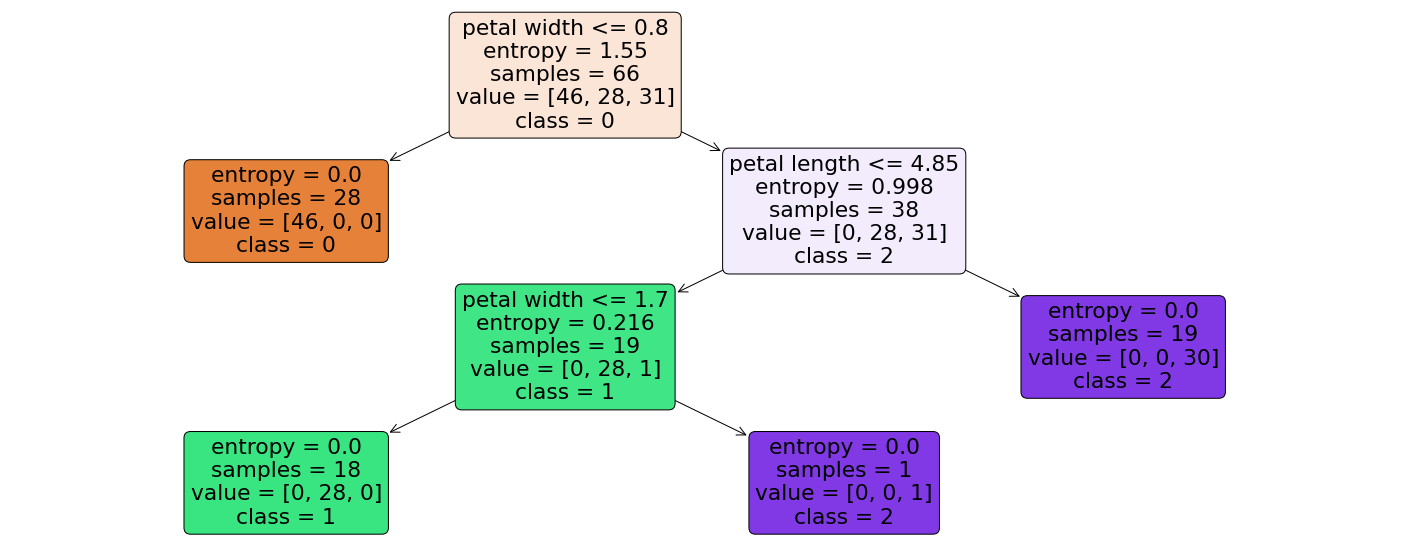

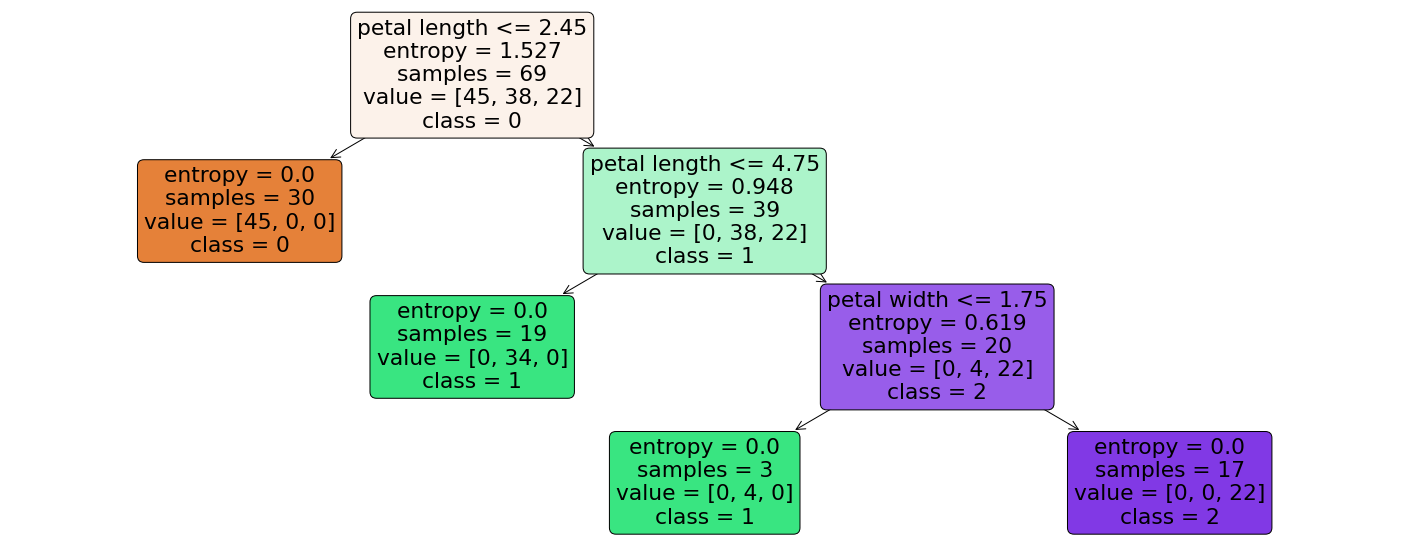

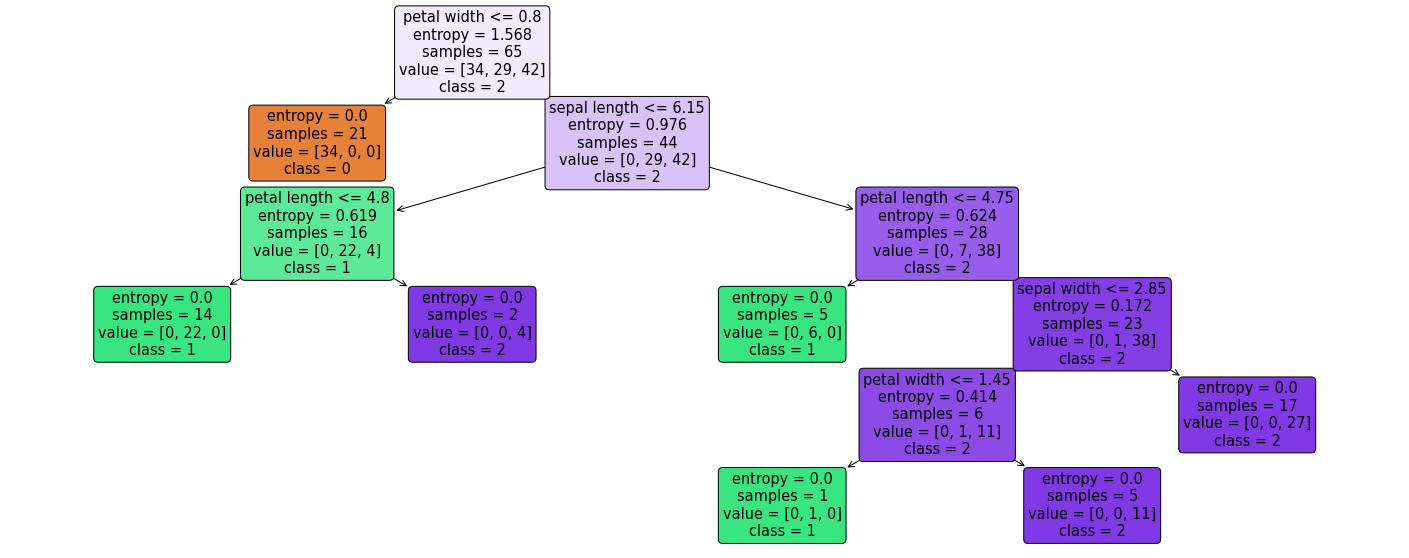

In [10]:
# visulaizing decision tree
for i in range(0,8,1):
    fig = plt.figure(figsize=(25,10))
    _ = tree.plot_tree(clf.estimators_[i], 
                       feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  
                       class_names=sorted(y.unique()),
                       label ='all',rounded = True,
                       filled=True)

### Removing the least important feature

In [11]:
X=data[['sepal length', 'petal length' , 'petal width']]  # Features
X = X.astype(str)
y=data['species']  # Labels
y = y.astype(str)

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [13]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=8,criterion="entropy",random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [14]:
# creating confusion matrix and accuracy score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[18  0  0]
 [ 0 13  0]
 [ 0  2 12]]


0.9555555555555556

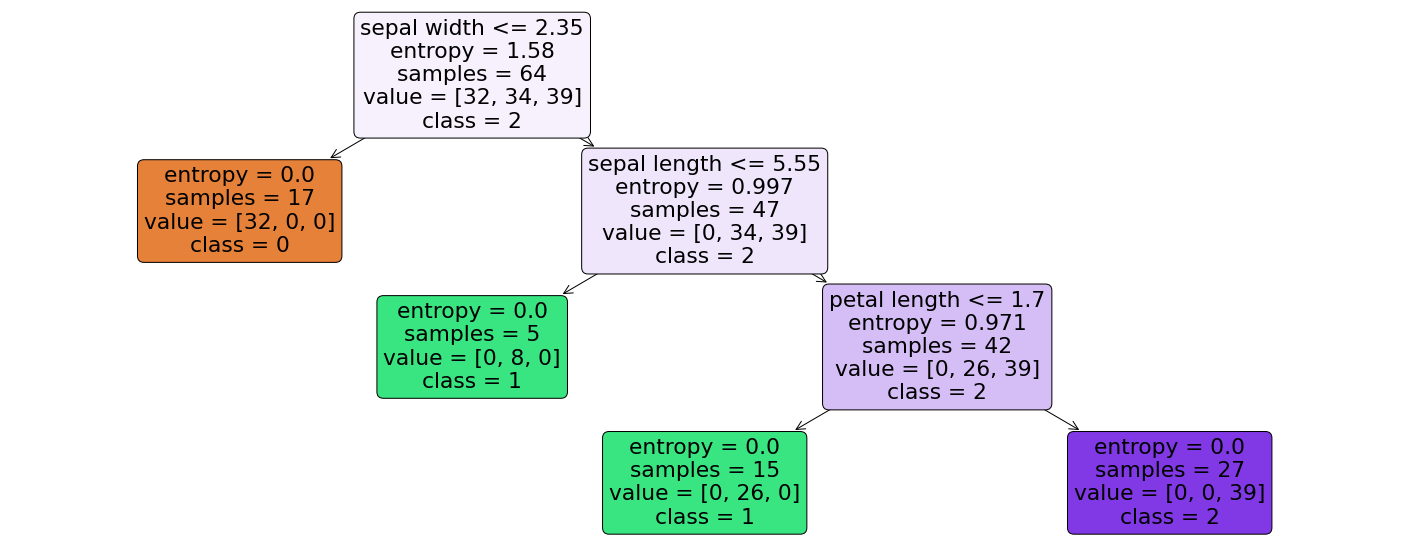

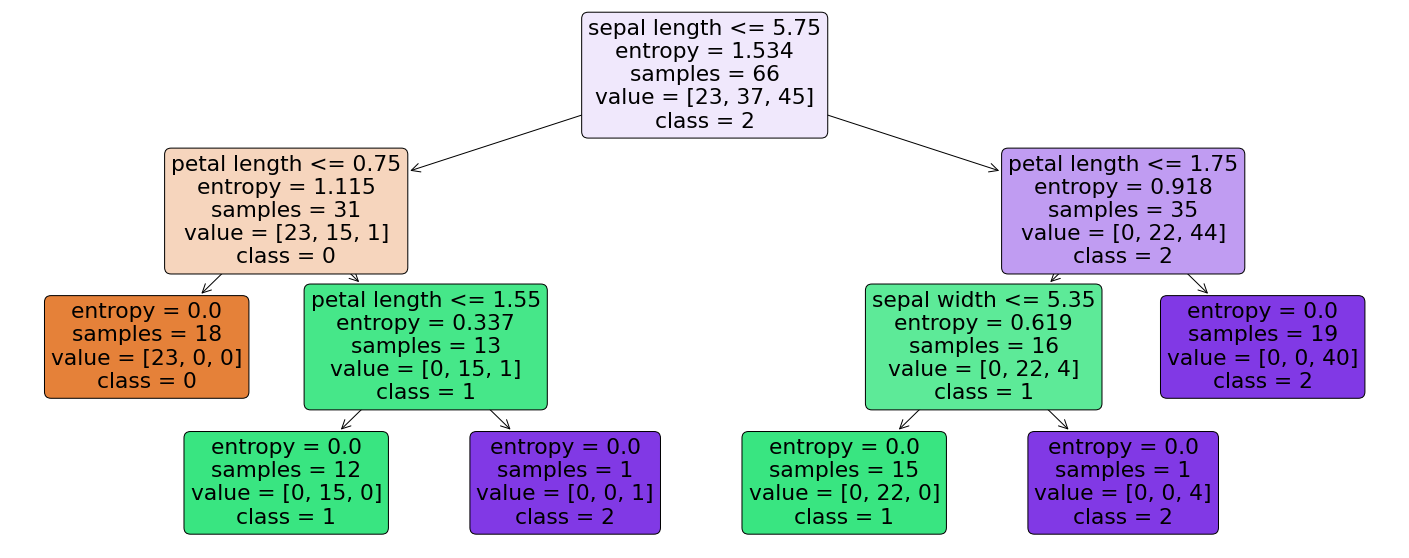

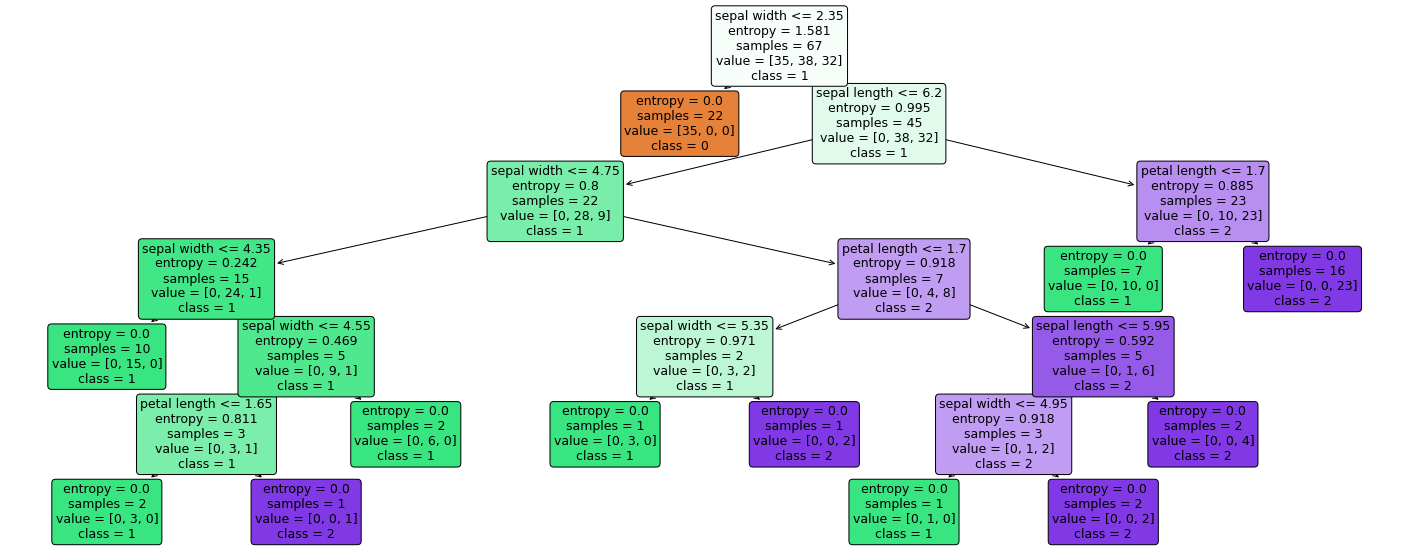

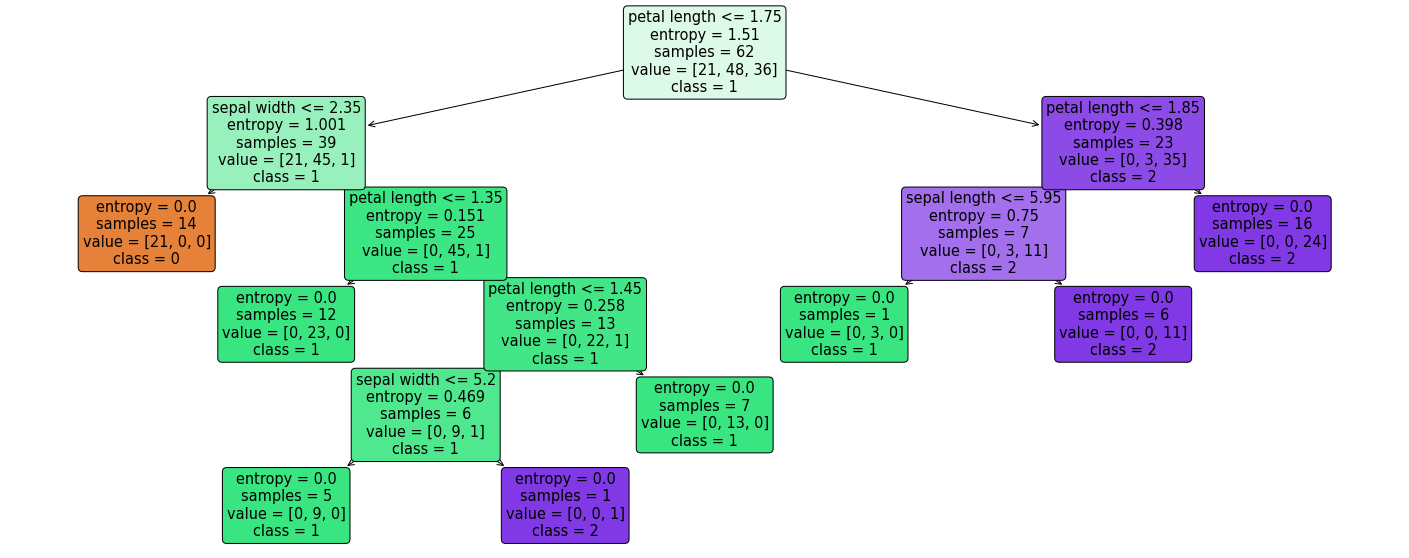

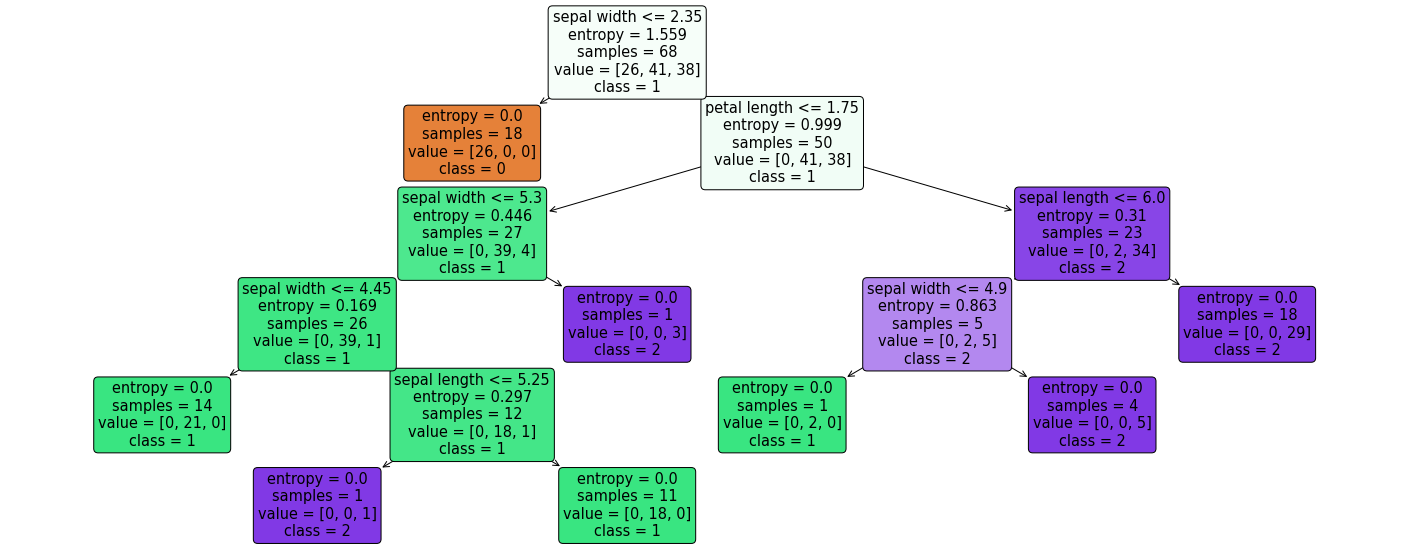

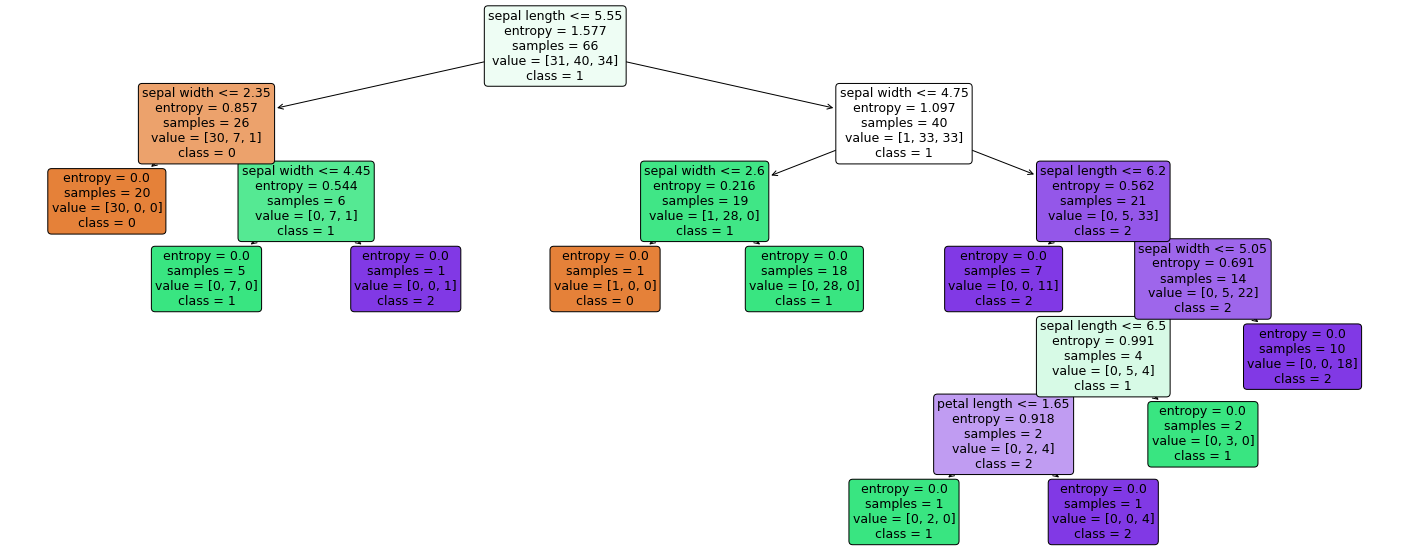

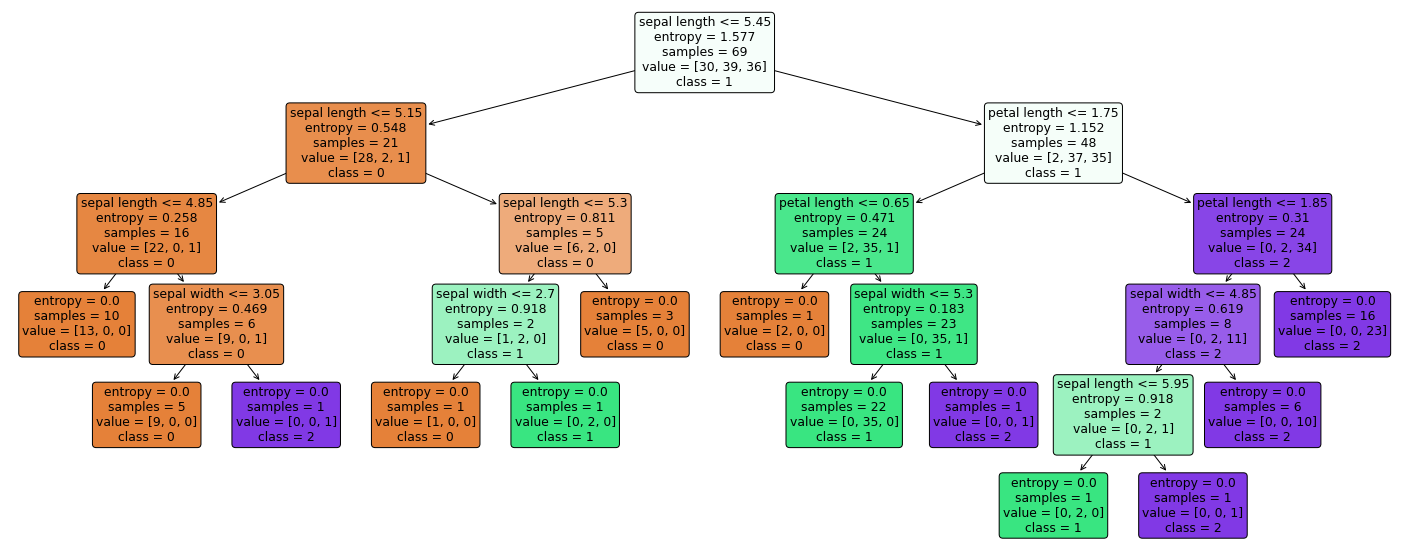

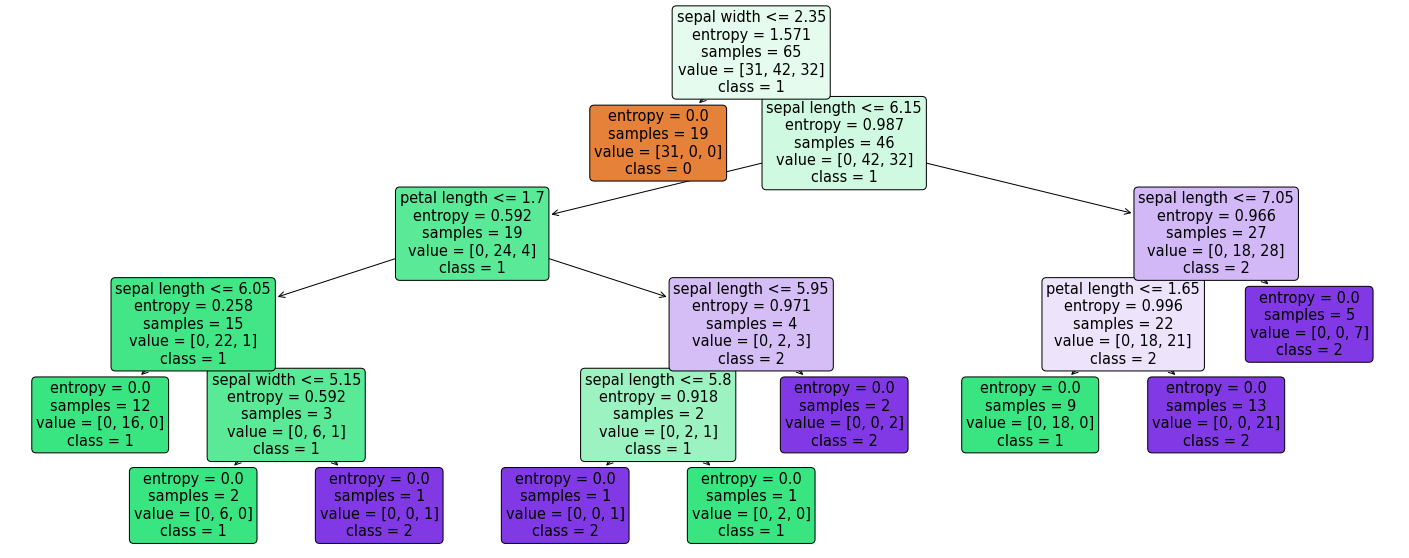

In [15]:
# visulaizing decision tree
for i in range(0,8,1):
    fig = plt.figure(figsize=(25,10))
    _ = tree.plot_tree(clf.estimators_[i], 
                       feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  
                       class_names=sorted(y.unique()),
                       label ='all',rounded = True,
                       filled=True)